In [66]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer, MinMaxScaler, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline

# Pre-processing

In [67]:
train_data_df = pd.read_csv('../data/train.csv')
test_data_df = pd.read_csv('../data/test.csv')

### Print DataFrame head

In [68]:
train_data_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [69]:
train_data_df['ps_car_03_cat'].head()

0   -1
1   -1
2   -1
3    0
4   -1
Name: ps_car_03_cat, dtype: int64

In [70]:
test_data_df.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


## Original data shape

In [71]:
train_data_df.shape

(595212, 59)

In [72]:
test_data_df.shape

(892816, 58)

## Column Names

In [73]:
train_data_df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


## Drop duplicates

In [74]:
train_data_df.drop_duplicates(inplace=True)
test_data_df.drop_duplicates(inplace=True)

## Replace missing values: `-1` with `np.nan`

In [11]:
train_data_df.replace(-1, np.nan, inplace=True)
test_data_df.replace(-1, np.nan, inplace=True)

## Initial count of missing values by column (or feature)

In [75]:
train_data_df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [76]:
test_data_df.isnull().sum()

id                0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


## Drop features in both training and testing sets

In [14]:
# Drop columns / features in `drop_labels` list
'''
drop_labels = ['ps_car_03_cat', 'ps_car_05_cat']
train_data_df.drop(labels=drop_labels, axis=1, inplace=True)
test_data_df.drop(labels=drop_labels, axis=1, inplace=True)
'''

"\ndrop_labels = ['ps_car_03_cat', 'ps_car_05_cat']\ntrain_data_df.drop(labels=drop_labels, axis=1, inplace=True)\ntest_data_df.drop(labels=drop_labels, axis=1, inplace=True)\n"

## Visualize distribution of columns with missing values

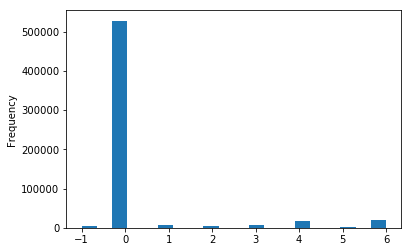

In [77]:
train_data_df.ps_ind_05_cat.plot.hist(bins=20)
plt.show()

In [78]:
# IMPORTANT: Check missing labels in both training and test sets
missing_labels_trn = ['ps_ind_02_cat', 
                      'ps_ind_04_cat', 
                      'ps_ind_05_cat',
                      'ps_reg_03',
                      'ps_car_01_cat',
                      'ps_car_02_cat',
                      'ps_car_07_cat',
                      'ps_car_09_cat',
                      'ps_car_11',
                      'ps_car_12', # only in training set
                      'ps_car_14'
                     ]

missing_labels_test = ['ps_ind_02_cat', 
                      'ps_ind_04_cat', 
                      'ps_ind_05_cat',
                      'ps_reg_03',
                      'ps_car_01_cat',
                      'ps_car_02_cat',
                      'ps_car_07_cat',
                      'ps_car_09_cat',
                      'ps_car_11',
                      'ps_car_14'
                     ]

### Fill in missing values 

In [17]:
# Fill in missing values based on individual column(feature) distributions
train_data_df.fillna(value=0, inplace=True)
test_data_df.fillna(value=0, inplace=True)


### Final count of missing values by column (or feature)

In [79]:
# Confirm there are zero missing values in training set
train_data_df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [80]:
# Confirm there are zero missing values in testing set
test_data_df.isnull().sum()

id                0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


In [81]:
train_data_df['ps_car_03_cat']

0        -1
1        -1
2        -1
3         0
4        -1
5        -1
6        -1
7         0
8        -1
9         0
10       -1
11       -1
12       -1
13        0
14       -1
15       -1
16       -1
17        1
18       -1
19       -1
20       -1
21       -1
22        0
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
595182   -1
595183   -1
595184   -1
595185    1
595186    0
595187   -1
595188   -1
595189    0
595190   -1
595191   -1
595192   -1
595193    0
595194    0
595195    1
595196   -1
595197   -1
595198    1
595199    1
595200   -1
595201    0
595202    0
595203    1
595204   -1
595205    0
595206   -1
595207   -1
595208   -1
595209   -1
595210   -1
595211   -1
Name: ps_car_03_cat, dtype: int64

### Load Data Function

In [82]:
def load_data(input_train, input_test):
    '''
    Loads and partitions data into features, labels, and ids
    Args:
    input_train: pre-processed training data as a pandas dataframe
    input_test: pre-processed test data as a pandas dataframe
    Returns:
    train: training data (excludes id and target columns)
    train_labels: target values as a numpy array
    test: test data (excludes id column)
    train_ids: training data id's as a numpy array
    test_id: test data id's as a numpy array
    '''
    #train_loader = pd.read_csv(path_train, dtype={'target': np.int8, 'id': np.int32})
    train = input_train.drop(['target', 'id'], axis=1)
    train_labels = input_train['target'].values
    train_ids = input_train['id'].values
    print('\nShape of raw train data:', train.shape)

    #test_loader = pd.read_csv(path_test, dtype={'id': np.int32})
    test = input_test.drop(['id'], axis=1)
    test_ids = input_test['id'].values
    print('\nShape of raw test data:', test.shape)

    return train, train_labels, test, train_ids, test_ids

### Feature Scaling Function

In [83]:
def scale_data(input_data, scaler=None):
    if not scaler:
        scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(input_data)
    output_scaled = scaler.transform(input_data)
    return output_scaled, scaler
    

### Timer

In [84]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod(
            (datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' %
              (thour, tmin, round(tsec, 2)))


## MODEL

### Segment data

In [85]:
# Load data set and target values
train, targets, test, train_ids, test_ids = load_data(train_data_df, test_data_df)
# Nuber of training examples
n_train = train.shape[0]
# Combine training and test sets
train_test = pd.concat((train, test)).reset_index(drop=True)
# Scale combined data sets
train_test_scaled, _ = scale_data(train_test, scaler=StandardScaler())


Shape of raw train data: (595212, 57)

Shape of raw test data: (892816, 57)


In [86]:
targets = targets.reshape([-1, 1])

In [87]:
targets.shape

(595212, 1)

In [88]:
# Split train and test sets
train = train_test_scaled[:n_train, :]
test = train_test_scaled[n_train:, :]
print('\n Shape of processed train data:', train.shape)
print(' Shape of processed test data:', test.shape)


 Shape of processed train data: (595212, 57)
 Shape of processed test data: (892816, 57)


### Randomly split training data into training and validation sets

In [89]:
# Split training data into training sets and validation sets
# Test sets are not affected

def train_val_set(train_data, target, n_splits=1, test_size=0.03):
    ss = StratifiedShuffleSplit(n_splits=n_splits, 
                                test_size=test_size, 
                               )
    train_idx, val_idx = next(ss.split(train_data, target))
    train_x, train_y = train_data[train_idx], target[train_idx]
    val_x, val_y = train_data[val_idx], target[val_idx]
    return train_x, train_y, val_x, val_y

In [90]:
train_x, train_y, val_x, val_y = train_val_set(train, targets)
# Check data shapes
print("Train shapes (x, y):", train_x.shape, train_y.shape)
print("Validation shapes (x, y):", val_x.shape, val_y.shape)
print("Test shapes (x, y):", test.shape)

Train shapes (x, y): (577355, 57) (577355, 1)
Validation shapes (x, y): (17857, 57) (17857, 1)
Test shapes (x, y): (892816, 57)


### Model Metrics

In [91]:
# Model Metrics
cv_LL = 0
cv_AUC = 0
cv_gini = 0
fpred = []
avpred = []
avreal = []
avids = []

### Normalized Gini Coefficient Implementation

In [92]:
# Implement normalized Gini coefficient functions

# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    '''
    actual: ground truth target values
    pred: our model predictions based on test set
    '''
    assert(len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:,1]))]
    total_losses = all[:, 0].sum()
    gini_sum = all[:, 0].cumsum().sum() / total_losses
 
    gini_sum -= (len(actual) + 1) / 2.0
    return gini_sum / len(actual)
 
def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)
 

### Activation Functions

In [93]:
# Use leaky relu for intermediate layers
def leaky_relu(z, alpha=0.3):
    '''
    Leaky ReLU activation function
    Inputs:
    z = result of wa + b
    alpha = slope
    '''
    a = tf.maximum(alpha * z, z)
    return a

# Use sigmoid for binary classification
def sigmoid(z):
    '''
    Sigmoid activation
    '''
    a = tf.sigmoid(z)
    return a

### Hyperparameters

In [94]:
# Hyperparameters
learning_rate = 0.0005
epochs = 60
batch_size = 16
keep_probability = 0.6
n_hidden_layers = 3
n_nodes = 512
display_step = 100

### Define layers

In [95]:
def relu_layer(x, num_nodes, dropout_prob):
    '''
    ReLU activation layer with Batch Normalization and Dropout
    '''
    x_layer = tf.contrib.layers.fully_connected(inputs=x, 
                                                num_outputs=num_nodes, 
                                                activation_fn=None, 
                                                weights_initializer=tf.contrib.layers.xavier_initializer()
                                               )
    bn_layer = tf.layers.batch_normalization(inputs=x_layer, training=is_training)
    relu_layer = leaky_relu(bn_layer)
    relu_layer = tf.contrib.layers.dropout(inputs=relu_layer, keep_prob=dropout_prob)
    return relu_layer

In [96]:
def elu_layer(x, num_nodes, dropout_prob):
    '''
    Exponential Linear Unit (ELU) activation
    '''
    x_layer = tf.contrib.layers.fully_connected(inputs=x, 
                                                num_outputs=num_nodes, 
                                                activation_fn=None, 
                                                weights_initializer=tf.contrib.layers.xavier_initializer()
                                               )
    bn_layer = tf.layers.batch_normalization(inputs=x_layer, training=is_training)
    elu_layer = tf.nn.elu(bn_layer)
    elu_layer = tf.contrib.layers.dropout(inputs=elu_layer, keep_prob=dropout_prob)
    return elu_layer

### Define the neural network structure

In [97]:
tf.reset_default_graph()

inputs_x = tf.placeholder(dtype=tf.float32, shape=[None, train_x.shape[1]])
labels_y = tf.placeholder(dtype=tf.float32, shape=[None, 1])
keep_prob = tf.placeholder(dtype=tf.float32, shape=(None))
is_training = tf.placeholder(dtype=tf.bool, shape=(None))
'''
# Leaky ReLU Activation
# Layer 1
x1 = relu_layer(x=inputs_x, num_nodes=n_nodes, dropout_prob=keep_prob)

#Layer 2
x2 = relu_layer(x=x1, num_nodes=n_nodes, dropout_prob=keep_prob)

#Layer 3
x3 = relu_layer(x=x2, num_nodes=n_nodes, dropout_prob=keep_prob)

#Layer 4
x4 = relu_layer(x=x3, num_nodes=n_nodes, dropout_prob=keep_prob)

'''
# ELU Activation
# Layer 1
x1 = elu_layer(x=inputs_x, num_nodes=n_nodes, dropout_prob=keep_prob)

#Layer 2
x2 = elu_layer(x=x1, num_nodes=n_nodes, dropout_prob=keep_prob)

#Layer 3
x3 = elu_layer(x=x2, num_nodes=n_nodes, dropout_prob=keep_prob)

#Layer 4
x4 = elu_layer(x=x3, num_nodes=n_nodes, dropout_prob=keep_prob)



# Logits
logits = tf.contrib.layers.fully_connected(inputs=x4, num_outputs=1, activation_fn=None)

# Cross Entropy
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels_y, logits=logits)

# Cost
cost = tf.reduce_mean(cross_entropy)

# Optimizer
with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Predictions
prediction = tf.nn.sigmoid(logits)
correct_prediction = tf.equal(labels_y, prediction)

# Accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

### Mini-batch Implementation

In [98]:
# Mini batch generator
def mini_batch(x, y, batch_size=batch_size):
    num_batches = len(x) // batch_size
    
    for batch in range(num_batches):
        if batch != (num_batches - 1):
            X, Y = x[batch * batch_size: (batch + 1) * batch_size], y[batch * batch_size: (batch + 1) * batch_size]
        else:
            X, Y = x[batch * batch_size:], y[batch * batch_size:]
        yield X, Y
    

In [99]:
def get_batches(x, y, n_batches=100):
    """ Return a generator that yields batches from arrays x and y. """
    batch_size = len(x)//n_batches
    
    for ii in range(0, n_batches*batch_size, batch_size):
        # If we're not on the last batch, grab data with size batch_size
        if ii != (n_batches-1)*batch_size:
            X, Y = x[ii: ii+batch_size], y[ii: ii+batch_size] 
        # On the last batch, grab the rest of the data
        else:
            X, Y = x[ii:], y[ii:]
        
        yield X, Y

# TRAINING

In [100]:
# Reset iteration counter
iterations = 0
gini_val = []
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        #for x, y in mini_batch(train_x, train_y):
        for x, y in get_batches(train_x, train_y):
            feed_trn = {inputs_x: x, 
                    labels_y: y,
                    keep_prob: keep_probability,
                    is_training: True
                   }
            loss, _ = sess.run([cost, optimizer], feed_dict=feed_trn)
            
            
            if iterations % display_step == 0:
                print('Epoch: {}/{}....'.format(epoch+1, epochs), 
                  'Iteration: {}....'.format(iterations),
                  'Training loss: {:.5f}'.format(loss))
                # Normalized Gini - Training
                actual_array = labels_y.eval(feed_dict=feed_trn, session=sess)
                pred_array = prediction.eval(feed_dict=feed_trn, session=sess)
                normalized_gini_train = gini_normalized(actual=actual_array, pred=pred_array)
                
                feed_val = {inputs_x: val_x,
                        labels_y: val_y,
                        keep_prob: keep_probability,
                        is_training: True
                       }
                val_accuracy = sess.run(accuracy, feed_dict=feed_val)
                print("Validation Acc: {:.4f}".format(val_accuracy))
                
                # Normalized Gini - Validation
                actual_array = labels_y.eval(feed_dict=feed_val, session=sess)
                pred_array = prediction.eval(feed_dict=feed_val, session=sess)
                normalized_gini_val = gini_normalized(actual=actual_array, pred=pred_array)
                gini_val.append((normalized_gini_train, normalized_gini_val))
                print("Training Gini: {:.4f}".format(normalized_gini_train))
                print("Valdation Gini: {:.4f}".format(normalized_gini_val))
            iterations += 1
    print('Training Completed')
    saver.save(sess, "checkpoints/porto_seguro.ckpt")

Epoch: 1/60.... Iteration: 0.... Training loss: 0.98416
Validation Acc: 0.0000
Training Gini: 0.0582
Valdation Gini: 0.0497
Epoch: 2/60.... Iteration: 100.... Training loss: 0.17769
Validation Acc: 0.0000
Training Gini: 0.0358
Valdation Gini: 0.0783
Epoch: 3/60.... Iteration: 200.... Training loss: 0.16221
Validation Acc: 0.0000
Training Gini: 0.0910
Valdation Gini: 0.0638
Epoch: 4/60.... Iteration: 300.... Training loss: 0.16327
Validation Acc: 0.0000
Training Gini: 0.1236
Valdation Gini: 0.1233
Epoch: 5/60.... Iteration: 400.... Training loss: 0.15947
Validation Acc: 0.0000
Training Gini: 0.0865
Valdation Gini: 0.0980
Epoch: 6/60.... Iteration: 500.... Training loss: 0.16143
Validation Acc: 0.0000
Training Gini: 0.2185
Valdation Gini: 0.1049
Epoch: 7/60.... Iteration: 600.... Training loss: 0.15644
Validation Acc: 0.0000
Training Gini: 0.1120
Valdation Gini: 0.0921
Epoch: 8/60.... Iteration: 700.... Training loss: 0.15604
Validation Acc: 0.0000
Training Gini: 0.1049
Valdation Gini: 0

### Model Predictions on Test Set

In [101]:
# Use saved model to generate predictions based on test data set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    feed_test = {inputs_x: test, labels_y: train_y, keep_prob: 1.0, is_training: False}
    test_y = prediction.eval(feed_dict=feed_test, session=sess)

INFO:tensorflow:Restoring parameters from checkpoints\porto_seguro.ckpt


### Write model predictions to submission file

In [102]:
# Read sample submission csv file
submission = pd.DataFrame(data=test_y, columns=['target'])
submission['id'] = test_ids
submission.set_index(keys='id', inplace=True, verify_integrity=True)
print(submission.head(15))
print(submission.shape)

# SET filename here!!!!
filename = 'Reference_4.csv'
submission.to_csv(filename, index=True, index_label='id')


'''
sample_submission_data_df = pd.read_csv('../results/reference.csv')

print("Sample submission file: {} x {}".format(*sample_submission_data_df.shape))

gini_outputs = gini_normalized(actual, pred)
print('Shape of normalized gini outputs: {}'.format(gini_outputs))

# Submission file has two columns: id, target
'''

      target
id          
0   0.030236
1   0.026526
2   0.022500
3   0.012615
4   0.030326
5   0.040255
6   0.017255
8   0.031362
10  0.066570
11  0.042701
12  0.030972
14  0.023362
15  0.047406
18  0.057525
21  0.042425
(892816, 1)


'\nsample_submission_data_df = pd.read_csv(\'../results/reference.csv\')\n\nprint("Sample submission file: {} x {}".format(*sample_submission_data_df.shape))\n\ngini_outputs = gini_normalized(actual, pred)\nprint(\'Shape of normalized gini outputs: {}\'.format(gini_outputs))\n\n# Submission file has two columns: id, target\n'

In [ ]:
def test_gini():
    def fequ(a,b):
        return abs(a - b) < 1e-6
    def T(a, p, g, n):
        assert(fequ(gini(a,p), g) )
        assert(fequ(gini_normalized(a,p), n) )
    T([1, 2, 3], [10, 20, 30], 0.111111, 1)
    T([1, 2, 3], [30, 20, 10], -0.111111, -1)
    T([1, 2, 3], [0, 0, 0], -0.111111, -1)
    T([3, 2, 1], [0, 0, 0], 0.111111, 1)
    T([1, 2, 4, 3], [0, 0, 0, 0], -0.1, -0.8)
    T([2, 1, 4, 3], [0, 0, 2, 1], 0.125, 1)
    T([0, 20, 40, 0, 10], [40, 40, 10, 5, 5], 0, 0)
    T([40, 0, 20, 0, 10], [1000000, 40, 40, 5, 5], 0.171428,
       0.6)
    T([40, 20, 10, 0, 0], [40, 20, 10, 0, 0], 0.285714, 1)
    T([1, 1, 0, 1], [0.86, 0.26, 0.52, 0.32], -0.041666,
       -0.333333)